# MATH 406 Assignment 1

**Name:** James Wu\
**Student number:** 92277235

In [4]:
### IMPORTS ###
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial as taylor

## Q1

### Q1(a)

With 2 points, we use linear interpolation. Solving for $a$ and $b$ in the interpolating function $L(x) = ax + b$ using $L(0) = 0$ and $L(1) = 1$ gives us
$$L(x) = x$$
on $[0,1]$. Then $f(1/2) \approx L(1/2)$, so
$$\boxed{f(1/2) \approx 1/2}$$

In [5]:
# Given data
x = np.array([0, 1])
y = np.array([0, 1])

# Polynomial coeffs
c = np.linalg.solve(np.vander(x), y)
print(f'Polynomial coeffs: {c}')

# Evaluate f(1/2)
ans = np.polyval(c, 1/2)
print(f'f(1/2): {ans}')

Polynomial coeffs: [1. 0.]
f(1/2): 0.5


### Q1(b)

With 3 points, we use quadratic interpolation. Solving for $a$, $b$, and $c$ in the interpolating function $Q(x) = ax^2 + bx + c$ using $Q(0) = 0$, $Q(1) = 1$, and $Q(-1) = 1/2$ gives us
$$Q(x) = \frac{3}{4}x^2 + \frac{1}{4}x$$
on $[-1,1]$. Then $f(1/2) \approx Q(1/2)$, so
$$\boxed{f(1/2) \approx 5/16}$$

In [7]:
# Given data
x = np.array([0, 1, -1])
y = np.array([0, 1, 1/2])

# Polynomial coeffs
c = np.linalg.solve(np.vander(x), y)
print(f'Polynomial coeffs: {c}')

# Evaluate f(1/2)
ans = np.polyval(c, 1/2)
print(f'f(1/2): {ans}')

Polynomial coeffs: [0.75 0.25 0.  ]
f(1/2): 0.3125


### Q1(c)

With 4 points, we use cubic interpolation. Solving for $a$, $b$, $c$, and $d$ in the interpolating function $C(x) = ax^3 + bx^2 + cx + d$ using $C(0) = 0$, $C(1) = 1$, $C(-1) = 1/2$, and $C(2) = 2$ gives us
$$C(x) = -\frac{1}{4}x^3 + \frac{3}{4}x^2 + \frac{1}{2}x$$
$$C'(x) = -\frac{3}{4}x^2 + \frac{3}{2}x + \frac{1}{2}$$
on $[-1,2]$. Then $f'(0) \approx C'(0)$, so
$$\boxed{f'(0) \approx 1/2}$$

In [9]:
# Given data
x = np.array([0, 1, -1, 2])
y = np.array([0, 1, 1/2, 2])

# Polynomial coeffs
c = np.linalg.solve(np.vander(x), y)
print(f'Polynomial coeffs: {c}')

# Differentiate polynomial
dc = np.polyder(c)
print(f'Differentiated coeffs: {dc}')

# Evaluate f'(0)
ans = np.polyval(dc, 0)
print(f"f'(0): {ans}")

Polynomial coeffs: [-0.25  0.75  0.5   0.  ]
Differentiated coeffs: [-0.75  1.5   0.5 ]
f'(0): 0.5


### Q1(d)

With 3 points, we use quadratic interpolation. Solving for $a$, $b$, and $c$ in the interpolating function $Q(x) = ax^2 + bx + c$ using $Q(0) = 1/2$, $Q(1) = 1$, and $Q(-1) = -1$ gives us
$$Q(x) = -\frac{1}{2}x^2 + x + \frac{1}{2}$$
on $[-1,1]$. Using the quadratic equation for $Q(x) = 0$ gets us the roots
$$x = \frac{-1 \pm \sqrt{1 + 1}}{-1} = 1 \pm \sqrt{2}$$
Although $1 - \sqrt{2} \in [-1,1]$, we have $1 + \sqrt{2} \notin [-1,1]$. Since our interpolation is only valid on $[-1,1]$, we approximate a root as
$$\boxed{x \approx 1 - \sqrt{2} \approx -0.414}$$

In [11]:
# Given data
x = np.array([0, 1, -1])
y = np.array([1/2, 1, -1])

# Polynomial coeffs
c = np.linalg.solve(np.vander(x), y)
print(f'Polynomial coeffs: {c}')

# Roots of quadratic
ans = np.roots(c)
print(f'Roots: {ans}')

Polynomial coeffs: [-0.5  1.   0.5]
Roots: [ 2.41421356 -0.41421356]


## Q2

First we numerically check the relative truncation error to get an *ansatz* of the number of terms we should have:

Max rel error for deg = 1: 0.07840485667761549
Max rel error for deg = 2: 0.07822539239066759
Max rel error for deg = 3: 0.011461804276752608
Max rel error for deg = 4: 0.011434873241395872
Max rel error for deg = 5: 0.0020473765267338697


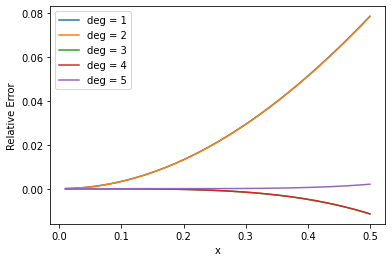

In [26]:
fig, ax = plt.subplots(figsize=(6,4))

x = np.linspace(0.01, 1/2, 1000)
y = np.arctan(x)

for deg in range(1, 6):
    err = (taylor(np.arctan, 0, deg, 0.001)(x) - y)/y
    ax.plot(x, err, label=f'deg = {deg}')
    print(f'Max rel error for deg = {deg}: {np.max(np.abs(err))}')

ax.set_xlabel('x')
ax.set_ylabel('Relative Error')
ax.legend()
plt.show()

So we should expect to go up to fifth order to have a relative error less than 1%; we will now prove this to be the case. Recall that the Taylor series for $\arctan(x)$ about $x = 0$ exists and converges on $[-1,1] \supset [0,1/2]$ as
$$\arctan(x) = \sum_{n=0}^\infty (-1)^n \frac{x^{2n+1}}{2n+1}$$
The presence of only odd powers is indeed supported by the above numerical results (based on how the error only changes every two degrees). We differentiate
$$\arctan'(x) = \frac{1}{1 + x^2}$$
So on $[0,1/2]$, we have $4/5 \leq \arctan'(x) \leq 1$. By MVT we have (note that $\arctan(x) \geq 0$ in this interval)
$$\frac{4}{5}x \leq \big|\arctan(x)\big| \leq x$$
Now let $E_N(x)$ be the error of the Taylor polynomial of degree $N$ evaluated at $x$ i.e.
$$E_N(x) = \sum_{n = \lceil N/2 \rceil}^\infty (-1)^n \frac{x^{2n+1}}{2n+1}$$
Now notice that successive terms decrease in magnitude on $x \in [0,1/2]$:
$$0 < \frac{2n+1}{2n+3} x^2 < 1 \; \therefore \; \frac{x^{2n+3}}{2n+3} = \frac{2n+1}{2n+3} x^2 \frac{x^{2n+1}}{2n+1} < \frac{x^{2n+1}}{2n+1}$$
Since the series alternates and is decreasing in magnitude versus $n$ for $x \geq 0$, we can bound
$$\frac{x^{2\lceil N/2 \rceil + 1}}{2\lceil N/2 \rceil + 1} - \frac{x^{2\lceil N/2 \rceil + 3}}{2\lceil N/2 \rceil + 3} \leq \big|E_N(x)\big| \leq \frac{x^{2\lceil N/2 \rceil + 1}}{2\lceil N/2 \rceil + 1}$$
Then the relative error $r_N(x) = \frac{\big|E_N(x)\big|}{\big|\arctan(x)\big|}$ is bounded as
$$\frac{x^{2\lceil N/2 \rceil}}{2\lceil N/2 \rceil + 1} - \frac{x^{2\lceil N/2 \rceil + 2}}{2\lceil N/2 \rceil + 3} \leq r_N(x) \leq \frac{5}{4}\frac{x^{2\lceil N/2 \rceil}}{2\lceil N/2 \rceil + 1}$$

For $N = 4$, at $x = 1/2$ we have
$$r_4(1/2) \geq \frac{(1/2)^4}{5} - \frac{(1/2)^6}{7} = \frac{23}{2240} > \frac{23}{2300} = 1\%$$
So the relative error is *not* bounded by 1% on $[0,1/2$] for $N = 4$. Now we check $N = 5$:
$$r_5(x) \leq \frac{5}{4} \frac{x^6}{7} \leq \frac{5}{4} \frac{(1/2)^6}{7} = \frac{5}{1792} < \frac{5}{500} = 1\%$$
The first inequality follows from how $x \leq 1/2$. Thus the $N = 5$ polynomial does have a relative error less than 1% on $[0,1/2]$.

So we must use the Taylor polynomial
$$\boxed{T_5(x) = x - \frac{x^3}{3} + \frac{x^5}{5}}$$
to obtain a relative error less than 1%. Though we may quibble over whether this counts as three terms or six (i.e. whether we should count the even powers of $x$, which have coefficients of zero), the Taylor polynomial required is unambiguous.

## Q3

Using shape functions, we have
$$F(x) = \sum_{i=1}^4 f(x_i) \frac{\prod_{j \neq i} (x - x_j)}{\prod_{j \neq i} (x_i - x_j)}$$
We assume $f(x)$ is analytic on the reference interval $[0,1]$ (which is true if $f$ is analytic in any neighbourhood of $x$ in the original interval since $h$ can be made to be arbitrarily small). Taylor expanding $f(x_i)$ about $x$ gets us
$$F(x) = T_0(x) + T_1(x) + T_2(x) + T_3(x) + T_4(x) + O(h^5)$$
where
$$T_0(x) = \sum_{i=1}^4 f(x) \frac{\prod_{j \neq i} (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = f(x) P_0(x)$$
$$P_0(x) = \sum_{i=1}^4 \frac{\prod_{j \neq i} (x - x_j)}{\prod_{j \neq i} (x_i - x_j)}$$
$$T_1(x) = \sum_{i=1}^4 f'(x) \frac{\prod_{j = 1}^4 (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = f'(x) P_1(x)$$
$$P_1(x) = \sum_{i=1}^4 \frac{\prod_{j = 1}^4 (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = \prod_{j = 1}^4 (x - x_j) \sum_{i=1}^4 \frac{1}{\prod_{j \neq i} (x_i - x_j)}$$
$$T_2(x) = \sum_{i=1}^4 \frac{f''(x)}{2} \frac{(x - x_i)\prod_{j = 1}^4 (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = \frac{f''(x)}{2} P_2(x)$$
$$P_2(x) = \prod_{j = 1}^4 (x - x_j) \sum_{i=1}^4 \frac{(x - x_i)}{\prod_{j \neq i} (x_i - x_j)}$$
$$T_3(x) = \sum_{i=1}^4 \frac{f^{(3)}(x)}{6} \frac{(x - x_i)^2\prod_{j = 1}^4 (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = \frac{f^{(3)}(x)}{6} P_3(x)$$
$$P_3(x) = \prod_{j = 1}^4 (x - x_j) \sum_{i=1}^4 \frac{(x - x_i)^2}{\prod_{j \neq i} (x_i - x_j)}$$
$$T_4(x) = \sum_{i=1}^4 \frac{f^{(4)}(x)}{24} \frac{(x - x_i)^3\prod_{j = 1}^4 (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = \frac{f^{(4)}(x)}{24} P_4(x)$$
$$P_4(x) = \prod_{j = 1}^4 (x - x_j) \sum_{i=1}^4 \frac{(x - x_i)^3}{\prod_{j \neq i} (x_i - x_j)}$$

Notice that for $i = 1, 2, 3, 4$ we have
$$P_0(x_i) = \frac{\prod_{j \neq i} (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = 1$$
Since $P_0(x)$ is a polynomial of degree at most 3 (each term is a product of three $(x - x_j)$), its derivative is a polynomial of degree at most two. But since $P_0(x)$ has four roots, its derivative has three roots by Rolle's theorem. Its derivative must therefore be the zero function (since nonzero polynomials of degree at most two can have at most two roots). Therefore $P_0(x) = 1$ is a constant function.

Meanwhile, we shall show for $n \geq 2$ that
$$q_1(x) = \sum_{i=1}^n \frac{1}{\prod_{j \neq i} (x_i - x_j)} = 0$$
with $n = 4$ as a special case. This can be seen by performing partial fraction decomposition on the $i=1$ term with $x_1$ as the independent variable (recall that the numerator in the term with $(x_i - x_j)$ as the denominator can be obtained by multiplying the original rational function by $(x_i - x_j)$ and subtituting $x_i = x_j$):
$$\frac{1}{\prod_{j=2}^n (x_1 - x_j)} = \sum_{i=2}^n \frac{1}{(x_1 - x_i) \prod_{j=2, j \neq i}^n (x_i - x_j)} = - \sum_{i=2}^n \frac{1}{\prod_{j \neq i} (x_i - x_j)}$$
This cancels out with all the other terms in the expression. This implies that $P_1(x)$ is zero.
We can similarly do PFD for
$$q_2(x) = \sum_{i=1}^n \frac{(x - x_i)}{\prod_{j \neq i} (x_i - x_j)} = 0$$
and
$$q_3(x) = \sum_{i=1}^n \frac{(x - x_i)^2}{\prod_{j \neq i} (x_i - x_j)} = 0$$
on the first term and cancel out all the other terms, allowing us to conclude $P_2(x)$ and $P_3(x)$ to be zero.

Now for $P_4(x)$ and $n = 4$, we cannot immediately use PFD because the degree of the numerator is the same as the degree of the denominator as a rational function of $x_i$. Instead, we rexpress the first term of $q_4(x)$ as
$$\frac{(x - x_1)^3}{\prod_{j \neq 1} (x_1 - x_j)} = -1 + \frac{(x - x_1)^3 + \prod_{j \neq 1} (x_1 - x_j)}{\prod_{j \neq i} (x_1 - x_j)}$$
The numerator $(x - x_1)^3 + \prod_{j \neq 1} (x_1 - x_j)$ is now at most degree 2 in $x_1$, with the $x_1^3$ term having a coefficient of zero in this expression. Performing PFD gets us
$$\frac{(x - x_1)^3}{\prod_{j \neq 1} (x_1 - x_j)} = -1 - \sum_{i=2}^4 \frac{(x - x_i)^3}{\prod_{j \neq i} (x_i - x_j)}$$
The latter term cancels out with the other terms of $q_4(x)$ so we have $q_4(x) = -1$.

We now arrive at
$$F(x) = f(x) - \frac{f^{(4)}(x)}{24} \prod_{i = 1}^4 (x - x_i) + O(h^5)$$
The error is then
$$e(x) = f(x) - F(x) = \frac{f^{(4)}(x)}{24} \prod_{i = 1}^4 (x - x_i) + O(h^5)$$
To leading order (i.e. $h^4$) the error is bounded by
$$\big| e(x) \big| = \big| f(x) - F(x) \big| \leq \frac{1}{24} \max \bigg| f^{(4)}(x) \prod_{i = 1}^4 (x - x_i) \bigg| = \frac{1}{24} \max \bigg| \prod_{i = 1}^4 (x - x_i) \bigg| K_4 h^4$$

We now seek to minimize $\max \bigg| \prod_{i = 1}^4 (x - x_i) \bigg|$ by varying $x_i$; for convenience we define $p(x) = \prod_{i = 1}^4 (x - x_i)$. We utilize the hint by assuming symmetry and we seek to balance the extrema of $p(x)$. Note that $p(x)$ has 3 extrema as it is a fourth degree polynomial: $x = y_0, y_1, y_2$. By Rolle's theorem, these are located as $x_1 < y_0 < x_2$, $x_2 < y_1 < x_3$, and $x_3 < y_2 < x_4$. By symmetry about $x = 1/2$, $p(0) = p(1)$, $p(y_0) = p(y_2)$, and $y_1 = 1/2$. Also, $x_4 = 1 - x_1$ and $x_3 = 1 - x_2$. We therefore need only equate $p(0) = p(y_0) = p(1/2)$.

We compute
$$p(x) = (x - x_1)(x - x_2)(x - (1 - x_1))(x - (1 - x_2))$$
$$p(0) = x_1x_2(1-x_1)(1-x_2)$$
$$p(1/2) = (1/2 - x_1)^2 (1/2 - x_2)^2$$

Using WolframAlpha, we find
$$y_0 = \frac{1}{2} - \frac{1}{2}\sqrt{1 - 2x_1 + 2x_1^2 - 2x_2 + 2x_2^2}$$
$$p(y_0) = -\frac{1}{4}(x_2 - x_1)^2(x_1 + x_2 - 1)^2$$

First equating $\big|p(y_0)\big| = \big|p(1/2)\big|$ gets us
$$(1/2 - x_1)^2 (1/2 - x_2)^2 = \frac{1}{4}(x_2 - x_1)^2(1 - x_1 - x_2)^2$$
$$(1 - 2x_1)(1 - 2x_2) = 2(x_2 - x_1)(1 - x_1 - x_2)$$
$$x_2^2 - 2(1 - x_1)x_2 + 1/2 - x_1^2 = 0$$
$$x_2 = (1 - x_1) \pm \sqrt{(1 - x_1)^2 - (1/2 - x_1^2)} = (1 - x_1) \pm \sqrt{2}(1/2 - x_1)$$

Now equating $\big|p(1/2)\big| = \big|p(0)\big|$ gets us
$$(1/2 - x_1)^4 (1 \pm \sqrt{2})^2 = x_1(1-x_1)\left[x_1(1-x_1) \mp \sqrt{2}(1 - 2x_1)(1/2 - x_1) - 2(1/2 - x_1)^2\right]$$
Let us define
$$y = (1/2 - x_1)^2 (1 \pm \sqrt{2}), \quad z = x_1(1 - x_1) \geq 0$$
Note that the sign of $y$ is the sign of $\pm$ since $\sqrt{2} > 1$. Now our equation becomes
$$y^2 = z(z - 2y)$$
$$y^2 + 2zy + z^2 = 0$$
$$y = -z \pm' \sqrt{2z^2} = -z(1 \mp' \sqrt{2})$$
Since $z \geq 0$, the sign of $y$ is the sign of $\pm'$ (i.e. oppositely signed to $\mp'$). It follows that $\pm = \pm'$, so $y = -z(1 \mp \sqrt{2})$. Thus
$$(1/2-x_1)^2 (1 \pm \sqrt{2}) = -x_1(1-x_1)(1 \mp \sqrt{2})$$
$$(1/2-x_1)^2 = -x_1(1-x_1) \frac{1 \mp \sqrt{2}}{1 \pm \sqrt{2}}$$
$$(1/2-x_1)^2 = x_1(1-x_1)\frac{\sqrt{2} \mp 1}{\sqrt{2} \pm 1} = x_1(1-x_1)(3 \mp 2\sqrt{2})$$
$$(4 \mp 2\sqrt{2})x_1^2 - (4 \mp 2\sqrt{2})x_1 + 1/4 = 0$$
We now re-introduce a second set of signs $\pm'$:
$$x_1 = \frac{(4 \mp 2\sqrt{2}) \pm' \sqrt{20 \mp 14\sqrt{2}}}{2(4 \mp 2\sqrt{2})}$$
To constrain $0 \leq x_1 \leq 1/2$, we are left with only two permutations of $(\pm, \pm')$:
$$x_1 = \frac{(4 - 2\sqrt{2}) - \sqrt{20 - 14\sqrt{2}}}{2(4 - 2\sqrt{2})}, \; \frac{(4 + 2\sqrt{2}) - \sqrt{20 + 14\sqrt{2}}}{2(4 + 2\sqrt{2})}$$
The corresponding values of $x_2$ satisfying $x_1 \leq x_2 \leq 1/2$ are
$$x_2 = (1 - x_1) - \sqrt{2}(1/2 - x_1)$$
for the two values of $x_1$. Trying these two values yields
$$x_1 = \frac{(4 + 2\sqrt{2}) - \sqrt{20 + 14\sqrt{2}}}{2(4 + 2\sqrt{2})}$$
as resulting in a smaller $\big|p(x)\big|$. Rearranging $x_1$ slightly for aesthetic purposes, and plugging in $x_2 = (1 - x_1) - \sqrt{2}(1/2 - x_1)$, $x_3 = 1 - x_2$, and $x_4 = 1 - x_3$, gives us the interpolating points of
$$\boxed{x_1 = \frac{(4 + 2\sqrt{2}) - \sqrt{20 + 14\sqrt{2}}}{2(4 + 2\sqrt{2})}, \quad x_2 = \frac{(4 + 2\sqrt{2}) - (\sqrt{2} - 1)\sqrt{20 + 14\sqrt{2}}}{2(4 + 2\sqrt{2})}, \quad x_3 = \frac{(4 + 2\sqrt{2}) + (\sqrt{2} - 1)\sqrt{20 + 14\sqrt{2}}}{2(4 + 2\sqrt{2})}, \quad x_4 = \frac{(4 + 2\sqrt{2}) + \sqrt{20 + 14\sqrt{2}}}{2(4 + 2\sqrt{2})}}$$
Numerically, these are
$$\boxed{x_1 = 0.03806, \quad x_2 = 0.30866, \quad x_3 = 0.69134, \quad x_4 = 0.96194}$$

The extremal value $p(0)$ is
$$p(0) = x_1x_2x_3x_4 = \frac{\left((24 + 16\sqrt{2}) - (20 + 14\sqrt{2})\right)\left((24 + 16\sqrt{2}) - (3 - 2\sqrt{2})(20 + 14\sqrt{2})\right)}{16(4 + 2\sqrt{2})^4}$$
$$p(0) = \frac{\left(4 + 2\sqrt{2}\right)\left((24 + 16\sqrt{2}) - (4  + 2\sqrt{2})\right)}{16(4 + 2\sqrt{2})^4} = \frac{20 + 14\sqrt{2}}{16(4 + 2\sqrt{2})^3} = \frac{\left(20+14\sqrt{2}\right)}{16\left(160+112\sqrt{2}\right)}$$
$$p(0) = \frac{1}{128}$$
And so
$$\max\big|e(x)\big| \leq \frac{1}{24 \cdot 128} K_4 h^4 = \frac{1}{3072}K_4h^4$$
$$\boxed{C = \frac{1}{3072} \approx 3.255 \times 10^{-4}}$$

## Q4

Since $x_1 = 0$ and $x_4 = 1$, we only have one free parameter for the interpolation points if we use symmetry. Then at least two of $|p(0)|, |p(y_0)|, |p(1/2)|$ are equal. To see why, suppose all three are distinct. Then we may vary $x_2$ (with $x_3 = 1 - x_2$) to decrease the largest of the three quantities until it becomes equal to the second largest of the three--at that point, decreasing it further would increase the other quantity to become the largest. But since $p(0) = x_1x_2x_3x_4 = 0$, this just becomes $|p(y_0)| = |p(1/2)|$ i.e.
$$\frac{1}{4} x_2^2 (1 - x_2)^2 = \frac{1}{4} (1/2 - x_2)^2$$
$$x_2(1 - x_2) = 1/2 - x_2$$
$$x_2^2 - 2x_2 + 1/2 = 0$$
$$x_2 = 1 \pm \sqrt{1/2}$$
Since $0 < x_2 < 1/2$, we take $x_2 = 1 - \frac{1}{\sqrt{2}}$. Thus
$$\boxed{x_1 = 0, \quad x_2 = 1 - \frac{1}{\sqrt{2}}, \quad x_3 = \frac{1}{\sqrt{2}}, \quad x_4 = 1}$$
Or numerically,
$$\boxed{x_1 = 0, \quad x_2 = 0.29289, \quad x_3 = 0.70711, \quad x_4 = 1}$$
Then
$$\max \big|p(x)\big| = \big|p(1/2)\big| = \frac{1}{4} (1/2 - x_2)^2 = \frac{3 - 2\sqrt{2}}{16}$$
So $C = \frac{1}{24}\max \big|p(x)\big|$ i.e.
$$\boxed{C = \frac{3 - 2\sqrt{2}}{384} \approx 4.468 \times 10^{-4}}$$

## Q5

To make a fair comparison, we use the same number of points $M$ for each method. 

**Q3 Method:** \
We require $4N$ data points, so $N = M/4$. Then $h = 4/M$, so
$$\max\big|e(x)\big| \leq \left(3.255 \times 10^{-4}\right)\frac{4^4}{M^4} = 0.083328 M^{-4}$$

**Q4 Method:** \
We require $2N$ interior data points and $N + 1$ boundary data points, for a total of $3N + 1$ points. so $N = (M - 1)/3 \approx M/3$ ($M$ is assumed to be large). Then $h = 3/M$, so
$$\max\big|e(x)\big| \leq \left(4.468 \times 10^{-4}\right)\frac{3^4}{M^4} = 0.036191 M^{-4}$$

**Conclusion:** *the Q4 method is more data efficient*, seeing that $0.036191 M^{-4} < 0.083328 M^{-4}$.

## Q6

In [7]:
def B(x):
    return np.pi/2 * x/(1+x)

In [10]:
def P(x):
    
    c0 = 0
    c1 = 1
    a2 = (1 - np.pi/4) / ((np.pi/4) * (np.pi/2 - 1))
    c2 = np.pi/2 * a2
    a1 = np.pi/2 * a2
    
    return (c0 + c1 * x + c2 * x * x) / (1 + a1 * x + a2 * x * x)

B(x) max error: 0.07111463743899749
P(x) max error: 0.04935928167857617


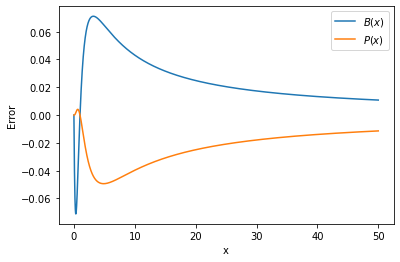

In [11]:
fig, ax = plt.subplots(figsize=(6,4))

x = np.linspace(0, 50, 5000)
e1 = np.arctan(x) - B(x)
e2 = np.arctan(x) - P(x)

ax.plot(x, e1, label='$B(x)$')
print(f'B(x) max error: {np.max(np.abs(e1))}')
ax.plot(x, e2, label='$P(x)$')
print(f'P(x) max error: {np.max(np.abs(e2))}')

ax.set_xlabel('x')
ax.set_ylabel('Error')
ax.legend()
plt.show()